# Infraestructure Manager revenue maximization with GSA

## 0. Load libraries

### WARNING!

Install local robin module: `python3 -m pip install -e /Users/david/PycharmProjects/robin`

In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from benchmarks.robin_railway import RevenueMaximization
from robin.services_generator.entities import ServiceGenerator
from src.entities import GSA

/Users/david/PycharmProjects/GSA_M/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
supply_config_path = Path("../configs/generator/supply_config.yml")

r = ServiceGenerator(supply_config_path=supply_config_path)

In [3]:
generator_config_path = Path("../configs/generator/generator_config.yml")

services = r.generate(file_name=Path("../data/supply_gen.yml"),
                      path_config=generator_config_path,
                      n_services=5,
                      seed=1)

In [4]:
s = services[0]
print(s)

Service id: 03612_2024-06-25-20.48 
	Date of service: 2024-06-25 
	Stops: ['60000', '71801'] 
	Line times (relative): [(0.0, 0.0), (163.0, 163.0)] 
	Line times (absolute): [('20:48', '20:48'), ('23:31', '23:31')] 
	Train Service Provider: [1, Renfe AVE, ['11', '12', '13']] 
	Time Slot: [74880, 20:48:00, 20:58:00, 20:53:00, 0:10:00] 
	Rolling Stock: [12, AVE RS2, {1: 250, 2: 50}] 
	Prices: 
		('60000', '71801'): {Turista: '52.64', Turista Plus: '63.17', Premium: '84.22'} 
	Tickets sold (seats): {Premium: 0, Turista: 0, Turista Plus: 0} 
	Tickets sold (hard type): {1: 0, 2: 0} 
	Tickets sold per each pair (seats): {('60000', '71801'): {Premium: 0, Turista: 0, Turista Plus: 0}} 
	Tickets sold per each pair (hard type): {('60000', '71801'): {2: 0, 1: 0}} 
	Capacity constraints: None 


In [20]:
s.tsp.rolling_stock

In [4]:
supply_path = Path("../data/supply_gen.yml")

sm = RevenueMaximization(supply_path, safe_headway=10)

In [5]:
gsa_algo = GSA(objective_function=sm.get_fitness_gsa,
               is_feasible=sm.feasible_services_times,
               custom_repair=sm.custom_repair,
               r_dim=len(sm.boundaries.real),
               d_dim=0,
               boundaries=sm.boundaries)

In [6]:
import cProfile as profile
import time

pr = profile.Profile()
pr.disable()

gsa_algo.set_seed(seed=15)

pop_size = 20

start = time.time()
pr.enable()
training_history = gsa_algo.optimize(population_size=pop_size,
                                     iters=100,
                                     chaotic_constant=False,
                                     repair_solution=True,
                                     initial_population=sm.get_initial_population(pop_size))
pr.disable()
print(f"Elapsed time: {round(time.time() - start, 2)} seconds")

pr.dump_stats('profile.pstat')

GSA is optimizing  "get_fitness_gsa"
Scheduled trains: 5
Scheduled trains: 5
Scheduled trains: 5
Scheduled trains: 5
Scheduled trains: 5
['At iteration 1 the best fitness is 624.376168338508']
['At iteration 2 the best fitness is 624.376168338508']
Scheduled trains: 5
['At iteration 3 the best fitness is 625.9142991765343']
['At iteration 4 the best fitness is 625.9142991765343']
Scheduled trains: 5
['At iteration 5 the best fitness is 637.7985578443245']
['At iteration 6 the best fitness is 637.7985578443245']
Scheduled trains: 5
['At iteration 7 the best fitness is 639.2431142482915']
['At iteration 8 the best fitness is 639.2431142482915']
Scheduled trains: 5
Scheduled trains: 5
Scheduled trains: 5
['At iteration 9 the best fitness is 641.544273832819']
['At iteration 10 the best fitness is 641.544273832819']
Scheduled trains: 5
Scheduled trains: 5
['At iteration 11 the best fitness is 642.0391848695848']
Scheduled trains: 5
['At iteration 12 the best fitness is 642.8915943881917']


In [7]:
sm.best_solution.real, sm.best_solution.discrete

(array([1248.,  821., 1224., 1177.,  960.]),
 array([ True,  True,  True,  True,  True]))

In [8]:
sm.get_revenue(sm.best_solution)

643.5

In [9]:
sm.is_feasible(sm.best_solution, sm.best_solution.discrete)

True

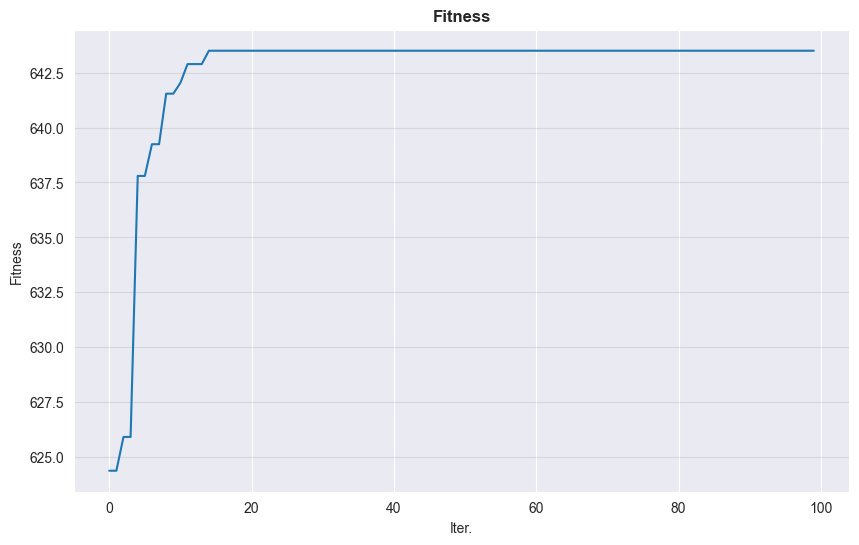

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Fitness", fontweight='bold')

# ax.set_ylim(min(global_train_hist["Fitness"]), max(global_train_hist["Fitness"]))
    
sns.lineplot(ax=ax,
             data=training_history,
             x="Iteration",
             y="Fitness",
             legend=True)

ax.grid(axis='y', color='#A9A9A9', alpha=0.3, zorder=1)

ax.set_xlabel("Iter.")
ax.set_ylabel("Fitness")

plt.show()
# fig.savefig(save_path, format='svg', dpi=300, bbox_inches='tight', transparent=True)

In [56]:
!snakeviz profile.pstat

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2FUsers%2Fdavid%2FPycharmProjects%2FGSA_M%2Fnotebooks%2Fprofile.pstat
^C

Bye!


In [11]:
sum([sm.revenue[service]['canon'] for service in sm.revenue])

643.5

In [12]:
training_history

,Iteration,Fitness,Accuracy,ExecutionTime,Discrete,Real
0,0,624.376168,0,0.004970,[],"[1250, 819, 1222, 1174, 958]"
1,1,624.376168,0,0.016452,[],"[1250, 819, 1222, 1174, 958]"
2,2,625.914299,0,0.026526,[],"[1249.0, 818.0, 1229.0, 1178.0, 960.0]"
3,3,625.914299,0,0.035476,[],"[1249.0, 818.0, 1229.0, 1178.0, 960.0]"
4,4,637.798558,0,0.043605,[],"[1247.0, 820.0, 1224.0, 1176.0, 962.0]"
...,...,...,...,...,...,...
95,95,643.500000,0,0.587362,[],"[1248.0, 821.0, 1224.0, 1177.0, 960.0]"
96,96,643.500000,0,0.592272,[],"[1248.0, 821.0, 1224.0, 1177.0, 960.0]"
97,97,643.500000,0,0.596478,[],"[1248.0, 821.0, 1224.0, 1177.0, 960.0]"
98,98,643.500000,0,0.600456,[],"[1248.0, 821.0, 1224.0, 1177.0, 960.0]"


In [13]:
from robin.scraping.entities import SupplySaver

SupplySaver(services).to_yaml(filename='supply.yml', save_path='../configs/gsa_results/')

In [15]:
from robin.kernel.entities import Kernel

path_config_supply = '../configs/gsa_results/supply.yml'
path_config_demand = '../configs/demand/demand.yml'
path_output_csv = '../data/output/robin/output.csv'

seed = 0

kernel = Kernel(path_config_supply, path_config_demand, seed)
services = kernel.simulate(output_path=path_output_csv, departure_time_hard_restriction=True)